In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
# Load dataset
df = pd.read_csv("house_prices.csv")

# Display first 5 rows
df.head()

,Id,SalePrice
0,1461,118633.420153
1,1462,162220.710382
2,1463,189656.747181
3,1464,203191.189164
4,1465,205856.623664


In [18]:
# Dataset information
df.info()
# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179968.890494
std,421.321334,82650.545473
min,1461.000000,36805.467870
25%,1825.500000,126705.836928
50%,2190.000000,158225.518880
75%,2554.500000,211301.992563
max,2919.000000,974675.783540


In [19]:
# Check missing values
df.isnull().sum()
# Fill numerical missing values with median
for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_79024\129842491.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_79024\129842491.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [20]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, drop_first=True)
df.head()

,Id,SalePrice
0,1461,118633.420153
1,1462,162220.710382
2,1463,189656.747181
3,1464,203191.189164
4,1465,205856.623664


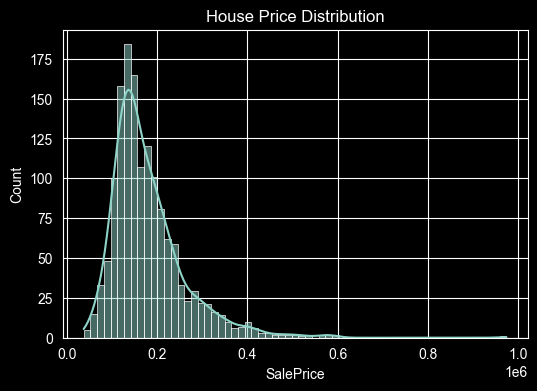

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title("House Price Distribution")
plt.show()

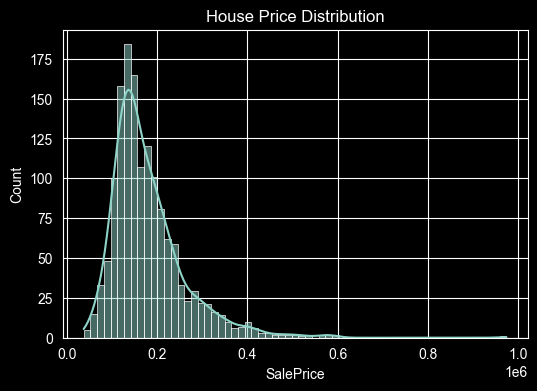

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['SalePrice'], kde=True)
plt.title("House Price Distribution")
plt.show()

In [23]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

In [27]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_scaled, y_train)

y_pred_gbr = gbr.predict(X_test_scaled)

In [28]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression MAE:", mae_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression MAE: 59391.90504516822
Linear Regression RMSE: 77948.36430956438


In [29]:
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))

print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)

Gradient Boosting MAE: 43174.10050110765
Gradient Boosting RMSE: 59637.26561327876


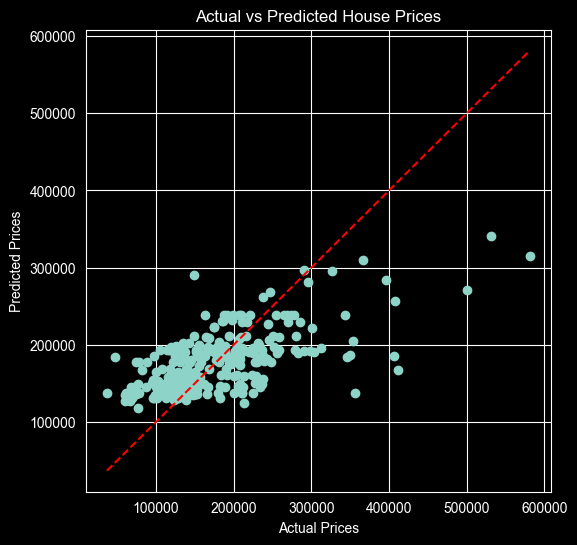

In [30]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_gbr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()